#安全認證

In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
cwd = os.getcwd()
print(cwd)
os.chdir("/content/drive/My Drive/ColabNotebooks")


/content


In [4]:
ls

 bin2result.png                         object_detection.ipynb
 courses/                               p2.png
 dogandcat/                             predictionimages/
 drive/                                 pretrainedmodel/
 hellowgooglemap.ipynb                  RunMinstByPython.ipynb
 Lecturesavestoremodelpredict.py        SegNetCMR/
'loadmodel andrunmedimgsegment.ipynb'   testdir.ipynb
 MNIST/                                 testplotimage0.ipynb
 mnist2/                                tmp/
 mnist_cnn.py                           TrainModelandSave.ipynb


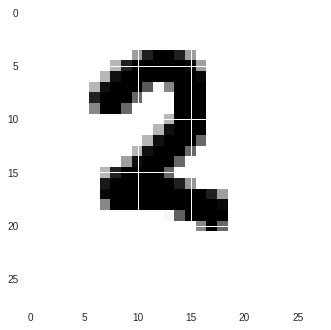

In [5]:
# plot image
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('p2.png') # 画像の読み込み
plt.imshow(img)

plt.show()


In [6]:
img.dtype

dtype('float32')

In [7]:
img.shape

(28, 28, 3)

In [0]:
imggray=img[:,:,0]

In [9]:
imggray.shape

(28, 28)

In [10]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [12]:
x_train_image.shape

(60000, 28, 28)

In [13]:
testimg=x_train_image[0,:,:]
testimg.shape

(28, 28)

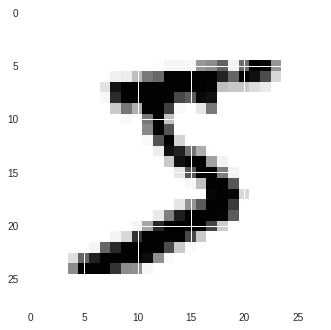

In [14]:
plt.imshow(testimg)

plt.show()

In [71]:
testimg

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
from PIL import Image
# Convert array to Image
imgbinarray = Image.fromarray(testimg)
imgbinarray.save('bin2result.png')

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [19]:
y_train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
y_train_label.shape

(60000,)

In [21]:
y_Train_OneHot.shape

(60000, 10)

In [22]:
y_Train_OneHot[0,:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

建立模型 Buliding Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [27]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型 training Model

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [100]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.0068 - acc: 0.9988 - val_loss: 0.0853 - val_acc: 0.9777
Epoch 2/20
 - 2s - loss: 0.0048 - acc: 0.9994 - val_loss: 0.0840 - val_acc: 0.9786
Epoch 3/20
 - 2s - loss: 0.0034 - acc: 0.9997 - val_loss: 0.0840 - val_acc: 0.9791
Epoch 4/20
 - 2s - loss: 0.0027 - acc: 0.9999 - val_loss: 0.0876 - val_acc: 0.9786
Epoch 5/20
 - 2s - loss: 0.0020 - acc: 0.9999 - val_loss: 0.0891 - val_acc: 0.9788
Epoch 6/20
 - 2s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0877 - val_acc: 0.9796
Epoch 7/20
 - 2s - loss: 0.0019 - acc: 0.9998 - val_loss: 0.0922 - val_acc: 0.9785
Epoch 8/20
 - 2s - loss: 0.0131 - acc: 0.9958 - val_loss: 0.1095 - val_acc: 0.9737
Epoch 9/20
 - 2s - loss: 0.0070 - acc: 0.9981 - val_loss: 0.0951 - val_acc: 0.9783
Epoch 10/20
 - 2s - loss: 0.0014 - acc: 0.9999 - val_loss: 0.0895 - val_acc: 0.9809
Epoch 11/20
 - 2s - loss: 6.7709e-04 - acc: 1.0000 - val_loss: 0.0889 - val_acc: 0.9802
Epoch 12/20
 - 2s - loss: 5.457

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

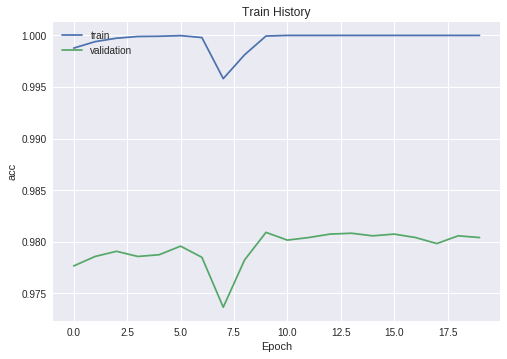

In [102]:
show_train_history(train_history,'acc','val_acc')

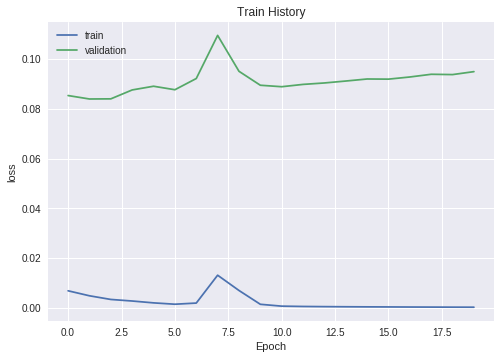

In [103]:
show_train_history(train_history,'loss','val_loss')

評估模型準確率 evaluation Model

In [104]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 29us/step

accuracy= 0.9807


In [105]:
x_Test_normalize.shape

(10000, 784)

In [106]:
y_Test_OneHot.shape

(10000, 10)

In [0]:
import numpy as np
myimg_onehot=np.array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],dtype='float32')
myimg_onehot = myimg_onehot.reshape(1, 10)

In [108]:
myimg_onehot.dtype

dtype('float32')

In [109]:
img_onehot

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_img =imggray.reshape(1, 784).astype('float32')

In [111]:
x_img.shape 

(1, 784)

In [0]:
x_img=1-x_img

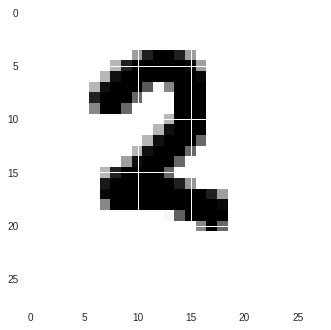

In [113]:
plt.imshow(img)

plt.show()

In [114]:
scores = model.evaluate(x_img, myimg_onehot)
print()
print('accuracy=',scores[0])

1/1 [==============================] - 0s 1ms/step

accuracy= 1.0398621559143066
